We must have seen a cloud filled with words in lot of Analysis tasks and machine learning projects. A WordCloud represents the importance of each word in a set of words by analyzing the frequency of terms. 

In this project, We will go through a detailed understanding of a WordCloud. At the end of this project, we would be able to create our own customised WordCloud that we have never gone through before.

The use of WordCloud is mostly in Natural Language Processing which is a field of Artificial Intelligence. The idea behind is that, it will represent the most used words in a paragraph, website, social media platforms or even in Speech to highlight the main focus of the article.

The dataset we will use here is based on wine reviews

In [4]:
# !pip install wordcloud --user

In [5]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### A Basic WordCloud
A WordCloud is a method which is mostly used in NLP to see the most frequent words among the text we are analyzing. Now let’s set up a basic WordCloud:

In [8]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
wordclouddcloud

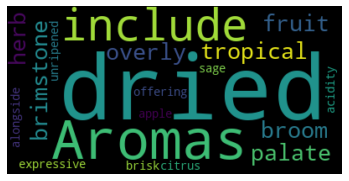

In [9]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

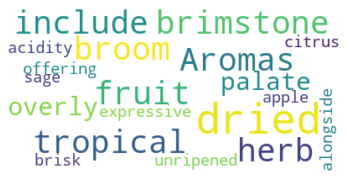

In [10]:
# Let’s manipulate some arguments like font size, maximum words, and background colour:

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

Now let’s combine all the reviews of wine we have in the data to set up and create a big WordCloud:

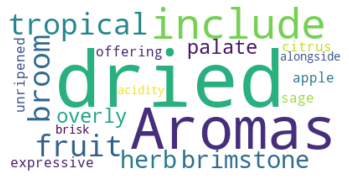

In [13]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see in the above figure that the **dried** and **Aromas** are the most used words in the data. Now let’s put all these WordCloud in the shape of a bottle of wine.

### Creating WordCloud with Shapes

If we want to put or create a WordCloud using a shape, then we need to find a **PNG file** of our desired shape. In our case, as we are using the reviews of the wine, we will use the form of the bottle of wine.

As all images have different structures so they will result in different outcomes. We will prepare the WordCloud according to the shape of the bottle. If we took another form, then we need to make the data accordingly. So the code below is only meant to perform at it’s best for the shape that we have chosen.

In [14]:
wine_mask = np.array(Image.open("wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [16]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

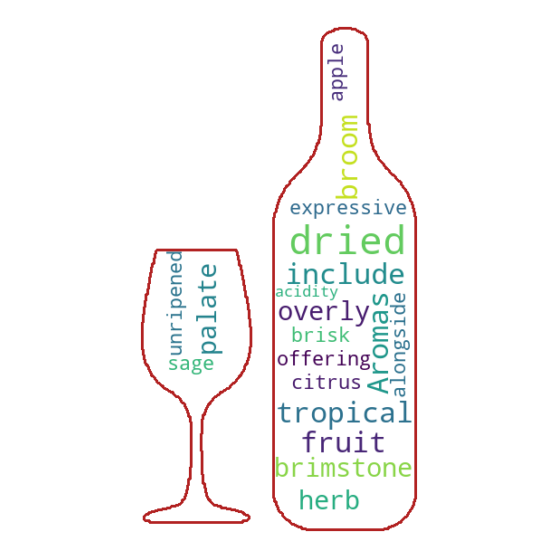

In [18]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, we have created a WordCloud in the shape of a wine bottle. It seems like the reviews of wine most often mention about **dried**, **Aromas** and **tropical** features of the wine.